# Problem set 2 (99 pts)

## Important information

1. We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2. Please submit the single Jupyter Notebook file, where only Python and Markdown/$\LaTeX$
 are used. Any hand-written solutions inserted by photos or in any other way are prohibitive and will not be graded. If you will have any questions about using Markdown, ask them!

3. The works will be checked for plagiarism. The score will be divided by the number of similar works.

# Problem 1 (44 pts)

Commonly enough the matrices arising in discretisations of particular problems are not just sparse, but also possess the *banded* property i.e. a general element of $A$ be $a_{ij}$, we say that it has an *upper bandwith* of $u$ and a *lower bandwith* of $l$ iff it may only nonzero between $l$-th and $u$-th main diagonals (in other words, $a_{ij}$ may only be nonzero when $i\le j+l$ and $j\le i+ u$).
In particular, any upper triangular matrix of size $n\times n$ has a lower bandwith of 1 and an upper bandwith of $n$.
The goal of this task is to endow you with some understanding of this important matrix class. Keep in mind that vectors are column.

1) (1 pts) Assume you are given a dyadic matrix $xy^T$. Suppose that only $a$ leading components of $x$ and $b$ leading components of $y$ are nonzero. What are the bandwiths of this matrix?


2) (3 pts) Assume you are given a banded matrix $A\in\mathbb{R}^{n\times n}$ with bandwiths $l$ and $u$. Examine the bandwidths of its $L$ and $U$ factors in LU decomposition, assuming its existence. Assume that the diagonal is nonzero for simplicity of the proof.

3) (3 pts) Assume we also perform pivoting in computing PLU decomposition, so that $A\ne LU$, but rather $PA = LU$. Examine the upper bandwidth of $U$.


4) (7 pts) Based on the intuition gained so far, propose and implement an LU algorithm for banded matrices specifically. Estimate the leading term in the complexity analysis. Pivoting is not needed.


5) (5 pts) Specify the above algorithm to tridiagonal matrices. Implement it and estimate complexity.


6) (10 pts) Since we are dealing with direct inversions, we would also like to know how the banded matrices invert. In particular, we would like to know if we can say something about inverses' structure. Show that the inverse of a banded matrix is a matrix with low-rank off-diagonal blocks and estimate the ranks thereof. Assume the matrix diagonal blocks nonsingular.

7) (10 pts) Finally, proof the following important fact, due to Strang: if both a matrix and its inverse are banded, then the matrix is a product of block diagonal factors; each factor is composed of $2\times2$ and $1\times1$ blocks, and the total number thereof is not dependent directly on the matrix dimension. Try to make it as convincing as you can.

8) (5 pts) Consider the inverse matrix of a banded matrix with the strcuture from task 7); consider also the transpose thereof. Show that they share bandwidths.

# Your solution is here
### 1.1
Suppose that $\mathbb{x} \in \mathbb{R}^m,\ m \geq a$ and $\mathbb{y} \in \mathbb{R}^n,\ n \geq b$.

\begin{align*}
\mathbb{x} = \begin{bmatrix} x_1\\
x_2\\
:\\
x_m\\
\end{bmatrix}\\
\\
\mathbb{y} = \begin{bmatrix} y_1\\
y_2\\
:\\
y_n\\
\end{bmatrix}\\
\end{align*}

Now, let $A = \mathbb{xy}^T$ and have general element $a_{ij}$. Thus, $a_{ij} = x_iy_j$. By definition of the vectors, we have that $x_i \neq 0 \iff i \leq a$ and $y_j \neq 0 \iff j \leq b$. Now, $$a_{ij} \neq 0 \iff x_iy_j \neq 0 \iff x_i \neq 0 \text{ and } y_j \neq 0$$
These give, $x_i \neq 0 \iff i \leq a$ and $y_j \neq 0 \iff j\leq b$. Note that as subscripts and hence counting or natural numbers, $1 \leq i$ and $j \leq 1$ thus $0 \leq i-1$, $0 \leq j-1$. Now, we can build the definition of band matrices thus,
$$0 \leq j-1, i \leq a \Rightarrow i+0 \leq a + j -1 \Rightarrow i \leq j + (a-1)$$
And
$$0 \leq i-1, j \leq b \Rightarrow j+0 \leq b + i -1 \Rightarrow j \leq i + (b-1)$$
Now, we just need to show that all $a_{ij}$ not satisfying $i \leq j + (a-1)$ and $j \leq i + (b-1)$ are all zeroes. Thus, we want to show that if $i > j + (a-1)$ or $j > i + (b-1)$, then $a_{ij}=0$. Now,

$$a_{ij} = 0 \iff x_iy_j = 0 \Rightarrow x_i = 0 \text{ or } y_j = 0$$

These give, $x_i = 0 \iff i > a$ or $y_j = 0 \iff j> b$. Now,
$$j-1 \geq 0 \Rightarrow a + j -1 \geq a \Rightarrow \text{ if we have }i > j+a-1 \text{ then } i > a \Rightarrow x_i = 0 $$

Similarly,

$$i-1 \geq 0 \Rightarrow b + i -1 \geq b \Rightarrow \text{ if we have }j > i+b-1 \text{ then } j > b \Rightarrow y_i = 0 $$
Giving $x_iy_j = 0$ as we wanted. Now, by definition, since, $i \leq j + (a-1)$ and $j \leq i + (b-1)$, it has an upper bandwidth of $(b-1)$ and a lower bandwidth of $(a-1)$.

Note that, if either $a$ or $b$ is equal to 0, then it reduces a null matrix.

### 1.2
Let the general elements of $L$ be $l_{ij}$ and the general elements of $U$ be $u_{ij}$ and the general elements of $A$ be $a_{ij}$. Hence, we have that $$A=LU \Rightarrow a_{ij}= \sum_{k=1}^{n} l_{ik}u_{kj}$$

$L$ and $U$ being lower and upper triangular matrices respectively, imply that $k>i \Rightarrow l_{ik} = 0$ and $k>j \Rightarrow u_{kj} = 0$. Hence, $k > \min(i, j) \Rightarrow l_{ik}u_{kj}=0$. Thus,

\begin{align*}
a_{ij}= \sum_{k=1}^{n} l_{ik}u_{kj} = \sum_{k=1}^{\min(i, j)} l_{ik}u_{kj}\\
\end{align*}

Now, by the bandwidth properties of $A$, have that, $i > j + l$ or $j > i + u$ implies $a_{ij}=0$.
Working on the assumption that the diagonal of $U$ is nonzero, and the existence of the factorisation implies that $L$ is invertible, hence has nonzero determinant and hence nonzero entries on its diagonal, we have that $u_{ii} \neq 0$ and $l_{ii} \neq 0$. I claim that, the upper bandwidth of $U$ is at most $u$ (note that lower bandwidth of $0$ is already a given since it is upper triangular). We shall use induction.

\begin{align*}
a_{1j} &= \sum_{k=1}^{\min(1, j)} l_{1k}u_{kj} = l_{11}u_{1j}\\
a_{1j} &= 0 \iff l_{11}u_{1j} = 0 \iff u_{1j}=0\\
&\text{Thus, for $j>1+u$, we have $u_{1j}=0$ }&\\
&\text{Suppose true up to $m$, that is, for $j>m+u, u_{mj}=0$}\\
&\text{We need to show that $u_{m+1j}=0$ given $j>m+1+u$}\\
a_{m+1j} &= \sum_{k=1}^{\min(m+1, j)} l_{m+1k}u_{kj}\\
&= \sum_{k=1}^{m+1} l_{m+1k}u_{kj}\\
&= l_{m+1m+1}u_{m+1j}+\sum_{k=1}^{m} l_{m+1k}u_{kj}\\
&\text{(In the summation above, we have that $1\leq k \leq m$.)}&\\
&\text{(Hence, $1\leq k \leq m \Rightarrow k < m+1$)}\\
&\text{($\Rightarrow k+u < m+1+u<j \Rightarrow u_{kj}=0$ and $a_{m+1j}=0$)}\\
0&= l_{m+1m+1}u_{m+1j} + 0\\
0&= l_{m+1m+1}u_{m+1j}, (l_{ii} \neq 0)\\
0&= u_{m+1j}\\
\end{align*}
This completes the proof of the claim. Thus, we have $i>j$ or $j>i+u \Rightarrow u_{ij} = 0$

I claim that the lower bandwidth of $L$ is at most $l$ (note that upper bandwidth of $0$ is already a given since it is lower triangular). We shall use induction.
\begin{align*}
a_{i1} &= \sum_{k=1}^{\min(i, 1)} l_{ik}u_{k1} = l_{i1}u_{11}\\
a_{i1} &= 0 \iff l_{i1}u_{11} = 0 \iff l_{i1}=0\\
&\text{Thus, for $i>1+l$, we have $l_{i1}=0$ }&\\
&\text{Suppose true up to $m$, that is, for $i>m+l, l_{im}=0$}\\
&\text{We need to show that $l_{im+1}=0$ given $i>m+1+l$}\\
a_{im+1} &= \sum_{k=1}^{\min(i,m+1)} l_{ik}u_{km+1}\\
&= \sum_{k=1}^{m+1} l_{ik}u_{km+1}\\
&= l_{im+1}u_{m+1m+1}+\sum_{k=1}^{m} l_{ik}u_{km+1}\\
&\text{(In the summation above, we have that $1\leq k \leq m$.)}&\\
&\text{(Hence, $1\leq k \leq m \Rightarrow k < m+1$)}\\
&\text{($\Rightarrow k+l < m+1+l<i \Rightarrow l_{ik}=0$ and $a_{im+1}=0$)}\\
0&= l_{im+1}u_{m+1m+1} + 0\\
0&= l_{im+1}u_{m+1m+1}, (u_{ii} \neq 0)\\
0&= l_{im+1}\\
\end{align*}
This completes the proof of the claim. Thus, we have $j>i$ or $i>j+l \Rightarrow l_{ij} = 0$. We could also consider the transpose to get the bandwidth of $L$ since $A^T = U^TL^T$ and use analogous arguments to the first part. We just note that transpose swaps the upper and lower bandwidths, thereby, $U^T$ becomes a lower triangular matrix and $L^T$ becomes an upper triangular matrix. From this problem, we have the following result, that when a matrix is LU factorisable, the upper bandwidth of U is at most the upper bandwidth of the matrix.

### 1.3
Let $C=PA=LU$. Let $p_{ij}$ be the general component of $P$. Since $P$ is a permutation matrix, we have that for a fixed $i$, there exists only one unique $j$ such that $p_{ij} = 1$ and $p_{ik} = 0$ for $k \neq j$. Recall that, $k > \min(i, j) \Rightarrow l_{ik}u_{kj}=0$. Thus, we have,

\begin{align*}
c_{ij} = \sum_{k=1}^{n} p_{ik}a_{kj}= \sum_{k=1}^{\min(i, j)} l_{ik}u_{kj}\\
\end{align*}

If for any $i$, we have, $c_{i1} = c_{i2} = \dots = c_{ii} = 0$, then $C$ does not admit $LU$ decomposition (without permutation). Hence, the row coming in the $ith$ position of $C$ by permutation, must be from the first $(i+l)$ rows in $A$. Because of bandwidth condition, any row in $A$ has at most $(u+l+1)$ consecutive nonzero elements

(By the bandwidth properties of $A$, have that, $a_{ij} \neq 0$ implies $i \leq j + l$ and $j \leq i + u$. Hence, $j-u \leq i \leq j+l \Rightarrow j+l-(j-u) + 1 = u+l+1$ possible nonzero values)

This maximum number of nonzero values on each row also applies to $C$ since we are only permutating rows of $A$. On an arbitrary row $i$ of $C$, let $c_{it}$ be the first non zero element, then, $c_{ij} = 0$ for $j > t+u+l$ (because there are at most $u+l+1$ nonzero values on each row). Since we know that for $c_{it}$ to be the first nonzero value, $t\leq i \Rightarrow t+u+l \leq i+u+l$. But, the farthest possible nonzero value on row $i$ happens when $t=i$ otherwise, $C$ will not admit $LU$ decomposition. Therefore, we have that $j > i+(u+l) \Rightarrow c_{ij} = 0$. Hence, the upper bandwidth of $C$ is $(u+l)$. Following the preceding problem, $C=LU$ implies that the upper bandwidth of $U$ is at most $(u+l)$. Note that if $u+l > n$ then upper bandwidth is at most $n$. Hence, upper bandwidth of $U$ is at most $\min(u+l, n)$. It is of interest to note that the bandwidth of $P$ is also at most $u+l$.

### 1.4
Let us redefine the matrices $L$ and $U$ thus:

\begin{align*}
L &= \begin{bmatrix}|& |& \dots& |\\
l^{(1)}& l^{(2)}& \dots & l^{(n)}\\
|& |& \dots& |\\
\end{bmatrix}\\
U &= \begin{bmatrix} -& u^{(1)T}& -\\
-& u^{(2)T}& -\\
-& \dots& -\\
-& u^{(n)T}& - \\
\end{bmatrix}\\
\Rightarrow A &= l^{(1)}u^{(1)T} + l^{(2)}u^{(2)T} + \dots + l^{(n)}u^{(n)T}\\
\end{align*}

In LU decomposition, we can without loss of generality set $l_{ii}=1 \forall i$ in $L$. Also, the restrictions from the bandwidths of $L$ and $U$ as gotten in preceding problems, imply that only $l^{(1)}u^{(1)T}$ contributes to the first row and column of $A$. A brief explanation is given: the bandwidth of $L$ gives $j>i$ or $i>j+l \Rightarrow l_{ij} = 0 \iff l^{(j)}_{i}=0$ and $i>j$ or $j>i+u \Rightarrow u_{ij} = 0 \iff u^{(i)T}_{j}=0$. Hence, we have $l_{11}=1$, the first row of $A$ is $u^{(1)T}$ and the first column of $A$ is $l^{(1)}$ then set $l^{(1)}_1 = 1$. Let $R_i(A)$ denote the $ith$ row of $A$ and let $C_j(A)$ denote the $jth$ column of $A$. Hence, because of the bandwidths of $L$ and $U$, it is obvious that the matrix formed by the intersection of the first $k$ rows and columns is contributued to by the sum: $l^{(1)}u^{(1)T} + l^{(2)}u^{(2)T} + \dots + l^{(k)}u^{(k)T}$ (the first $k-1$ components of $l^{(k)}$ and $u^{(k-1)T}$ are all equal to $0$ for any $k$), so considering the difference of this sum for $k$ and $k+1$ should give us a way to get the $(k+1)th$ term in the sum and that is the idea of this algorithm.

The algorithm will run thus:
\begin{align*}
&1.\ u^{(1)T} = R_1(A)\\
&2.\ l^{(1)} = \frac{C_1(A)}{u^{(1)}_1}\\
&3.\ l^{(1)}_{1}=1\\
&4.\ A = A - l^{(1)}u^{(1)T}\\
&\text{ Only do for $a_{ij}, l^{(1)}_{i}, u^{(1)}_{j}$ with $1 \leq i\leq l+1$ and $1\leq j \leq u+1$}\\
&5.\ u^{(2)T} = R_2(A)\\
&6.\ l^{(2)} = \frac{C_2(A)}{u^{(2)}_2}\\
&7.\ l^{(2)}_{2} = 1\\
&8.\ A = A - l^{(2)}u^{(2)T}\\
&\text{ Only do for $a_{ij}, l^{(2)}_{i}, u^{(2)}_{j}$ with $2 \leq i\leq l+2$ and $2\leq j \leq u+2$}\\
& \dots \\
&\text{In the $kth$ iteration}\\
4k-3&.\ u^{(k)T} = R_k(A)\\
4k-2&.\ l^{(k)} = \frac{C_k(A)}{u^{(k)}_k}\\
4k-1&.\ l^{(k)}_k=1\\
4k&.\ A = A - l^{(k)}u^{(k)T}\\
&\text{ Only do for $a_{ij}, l^{(k)}_{i}, u^{(k)}_{j}$ with $k \leq i\leq l+k$ and $k\leq j \leq u+k$}\\
\end{align*}

Now, lets try to understand the complexity in each iteration. In each vector multiplication, $l^{(i)}u^{(i)T}$, only $lu$ operations are needed since each $l^{(i)}$ has at most $l$ nonzero components, and each $u^{(i)T}$ has at most $u$ nonzero components. In the matrix addition, $A = A - l^{(k)}u^{(k)T}$ , since we only do for $a_{ij}$ with $k \leq i\leq l+k$ and $k\leq j \leq u+k$, time complexity will be $lu$. Each of the $l^{(k)} = \frac{C_k(A)}{u^{(k)}_k}$ steps will require $l$ operations. Each iteration will cost $2lu+l$ operations, and we do this $n$ times, thus time complexity is $\mathcal{O}(nl(2u+1))=\mathcal{O}(nlu)$.

Algorithm summary/pseudocode given $A$, $n$, $l$ and $u$ as data:
Set $a_{ij} = 0$ for $i,j > n$
1. For $k$ in range $1 \leq k \leq n$:
2. --- $l^{(k)}_{k} = 1$
3. --- For $j$ in range $k \leq j \leq u+k$:
4. --- --- $u^{(k)}_{j}=a_{kj}$
5. --- For $i$ in range $k+1 \leq i \leq l+k$:
6. --- --- $l^{(k)}_{i}=\frac{a_{ik}}{u^{(k)}_k}$
7. --- For $i$ in  range $k+1 \leq i \leq l+k$, $j$ in range $k+1 \leq j \leq u+k$:
8. --- --- $a_{ij} = a_{ij} - l^{(k)}_{i}u^{(k)}_{j}$
9. For $1 \leq i, j \leq n$:
10. --- For $j>i$ or $i>j+l$:
11. --- --- $l^{(j)}_{i}=0$
12. --- For $i>j$ or $j>i+u$:
13. --- --- $u^{(i)}_{j}=0$
14. Return:
\begin{align*}
L &= \begin{bmatrix}|& |& \dots& |\\
l^{(1)}& l^{(2)}& \dots & l^{(n)}\\
|& |& \dots& |\\
\end{bmatrix}\\
U &= \begin{bmatrix} -& u^{(1)T}& -\\
-& u^{(2)T}& -\\
-& \dots& -\\
-& u^{(n)T}& - \\
\end{bmatrix}\\
\Rightarrow A &= l^{(1)}u^{(1)T} + l^{(2)}u^{(2)T} + \dots + l^{(n)}u^{(n)T}\\
\end{align*}

Note, for line 7, $i$ starts iterating from $k+1$, because, after setting $l^{(k)}_k =1$, running that operation for $i=k$ just sets $a_{kj}=0$ similar argument for $j$.

### 1.5

For tridiagonal matrices, we would have $l=u=1$. Thus the algorithm would have $\mathcal{O}(n(2+1))= \mathcal{O}(3n) =\mathcal{O}(n)$ time complexity. The algorithm can be improved and will look thus:

1. For $k$ in range $1 \leq k \leq n-1$:
2. --- $l^{(k)}_{k} = 1$
3. --- $u^{(k)}_{k}=a_{kk}$
4. --- $l^{(k)}_{k+1}=\frac{a_{k+1 \ k}}{u^{(k)}_{k}}$
5. --- $u^{(k)}_{k+1}=a_{k\ k+1}$
6. --- $a_{k+1\ k+1} = a_{k+1\ k+1} - l^{(k)}_{k+1}u^{(k)}_{k+1}$
7. $l^{(n)}_{n} = 1$, $u^{(n)}_{n} = a_{nn}$
8. For $1 \leq i, j \leq n$:
9. --- For $j>i$ or $i>j+1$:
10. --- --- $l^{(j)}_{i}=0$
11. --- For $i>j$ or $j>i+1$:
12. --- --- $u^{(i)}_{j}=0$
13. Return:
\begin{align*}
L &= \begin{bmatrix}|& |& \dots& |\\
l^{(1)}& l^{(2)}& \dots & l^{(n)}\\
|& |& \dots& |\\
\end{bmatrix}\\
U &= \begin{bmatrix} -& u^{(1)T}& -\\
-& u^{(2)T}& -\\
-& \dots& -\\
-& u^{(n)T}& - \\
\end{bmatrix}\\
\Rightarrow A &= l^{(1)}u^{(1)T} + l^{(2)}u^{(2)T} + \dots + l^{(n)}u^{(n)T}\\
\end{align*}

Lets test the algorithm:
\begin{align*}
A &= \begin{bmatrix}1& 3& 0& 0\\
2& 1& 3& 0\\
0& 2& 1& 3\\
0& 0& 2& 1\\
\end{bmatrix}\\
\end{align*}

1. For $k$ in range $1 \leq k \leq 4$:
We run the loop.

For $k=1$

2. --- $l^{(1)}_{1} = 1$
3. --- $u^{(1)}_{1} = 1$
4. --- $l^{(1)}_{2} = \frac{2}{1}=2$
5. --- $u^{(1)}_{2} = 3$
6. --- $a_{22} = 1 - 2(2) = -5$

For $k=2$

7. --- $l^{(2)}_{2} = 1$
8. --- $u^{(2)}_{2} = -5$
9. --- $l^{(2)}_{3} = -\frac{2}{5}$
10. --- $u^{(2)}_{3} = 3$
11. --- $a_{33} = 1 +\frac{2}{5}(3) = \frac{11}{5}$

For $k=3$

12. --- $l^{(3)}_{3} = 1$
13. --- $u^{(3)}_{3} = \frac{11}{5}$
14. --- $l^{(3)}_{4} = \frac{2}{\frac{11}{5}}=\frac{10}{11}$
15. --- $u^{(3)}_{4} = 3$
16. --- $a_{44} = 1 - \frac{10}{11}(3) = -\frac{19}{11}$

For $k=4$

17. --- $l^{(4)}_{4} = 1$
18. --- $u^{(4)}_{4} = -\frac{19}{11}$

19. For $1 \leq i, j \leq 4$:
20. --- For $j>i$ or $i>j+1$:
21. --- --- $l^{(j)}_{i}=0$
22. --- For $i>j$ or $j>i+1$:
23. --- --- $u^{(i)}_{j}=0$

\begin{align*}
L = \begin{bmatrix}1& 0& 0& 0\\
2& 1& 0& 0\\
0& -\frac{2}{5}& 1& 0\\
0& 0& \frac{10}{11}& 1\\
\end{bmatrix} \text{ and } U = \begin{bmatrix}1& 3& 0& 0\\
0& -5& 3& 0\\
0& 0& \frac{11}{5}& 3\\
0& 0& 0& -\frac{19}{11}\\
\end{bmatrix}
\end{align*}

### 1.6

Let $A$ be the matrix as defined in preceding problems, (with upper and lower bandwidths of $u$ and $l$ respectively). Since $A$ has upper bandwidth of $u$, it can be expressed in block form via matrices $X \in \mathbb{R}^{r\times (u+r)}$, $Y \in \mathbb{R}^{(n-r)\times (u+r)}$ and $Z \in \mathbb{R}^{(n-r) \times (n-u-r)}$, for $1 \leq r<n-u$, thus:

\begin{align*}
A = \begin{bmatrix}
X& 0\\
Y& Z\\
\end{bmatrix}\\
\end{align*}

Since $A$ and $A^{-1}$ have to be able to be multiplied from either direction, ($AA^{-1} = A^{-1}A$), $A^{-1}$ can be expressed in block form via matrices $P \in \mathbb{R}^{(u+r)\times r}$, $Q \in \mathbb{R}^{(u+r)\times (n-r)}$, $R \in \mathbb{R}^{(n-u-r)\times r}$ and $S \in \mathbb{R}^{(n-u-r)\times (n-r)}$ thus:

\begin{align*}
A^{-1} = \begin{bmatrix}
P& Q\\
R& S\\
\end{bmatrix}\\
\end{align*}

Now,

\begin{align*}
AA^{-1} = \begin{bmatrix}
XP& XQ\\
YP + ZR& YQ + ZS\\
\end{bmatrix} = \begin{bmatrix}
I_r& 0\\
0& I_{n-r}\\
\end{bmatrix}\\ \text{ blocks of $r\times r$ and $(n-r) \times (n-r)$ identity matrices, respectively}\\
\end{align*}

Hence, $XQ=0$, and $\text{rank}(XQ) = 0 $. Since, we are assuming the matrix diagonal blocks are nonsingular, it means the square matrix formed by taking the first $r$ columns of $X$ has full rank, hence $\text{rank}(X) = r $ (Recall, $X \in \mathbb{R}^{r\times (u+r)}$ and rank is dimension of column space. We have shown the existence of $r$ independent column vectors based on our assumption). By [Sylvester's rank inequality](https://en.wikipedia.org/wiki/Rank_(linear_algebra)), we have,

\begin{align*}
\text{rank}(X)+\text{rank}(Q)-(u+r) &\leq \text{rank}(XQ)\\
\Rightarrow r + \text{rank}(Q) - u - r &\leq 0 \\
\Rightarrow \text{rank}(Q) &\leq u\\
\end{align*}

Now, let $Q'$ be any off-diagonal block of $A^{-1}$ in the upper part of the matrix. If $Q' \in \mathbb{R}^{r \times a } \Rightarrow r+a \leq n \Rightarrow a \leq n-r$. If $n-u\leq r < n$ then $a \leq n-r \leq u$ and rank would be at most $\min(u, r) \leq u$. If $1\leq r < n-u$, then $Q'$ is a block of $Q$. Filling necessary entries with $0$, we can construct a matrix $Q''$ with same dimensions as $Q$, but same rank as $Q'$. Then $(Q-Q'')+Q'' = Q$. Then by [Subadditivity inequlaity of ranks](https://en.wikipedia.org/wiki/Rank_(linear_algebra)) and nonnegativity of ranks, $\text{rank}(Q')=\text{rank}(Q'') \leq \text{rank}(Q-Q'')+\text{rank}(Q'') \leq \text{rank}(Q)\leq u$. Hence, $\text{rank}(Q') \leq u$. All upper off-diagonal blocks have rank at most $u$. For the lower off-diagonal blocks, consider the transpose of $A$. As stated earlier, the upper bandwidth of $A^T$ is $l$ and can easily be got. Now, by the result just got, upper off-diagonals of $(A^T)^{-1}$ will have rank at most $l$. But, $(A^T)^{-1}=(A^{-1})^T$. Now, upper off-diagonal blocks of $(A^{-1})^T$ are lower off-diagonal blocks of $A^{-1}$. Hence, the lower off-diagonal blocks have ranks at most $l$ and the upper off-diagonal blocks have ranks at most $u$.

### 1.7

### Claim 1:
We first, prove that for any non singular lower triangular matrix, $L$ with lower bandwidth $l$, we can multiply it by a matrix of the form of diagonal block matrix with blocks of dimensions $1\times 1$ and $2\times 2$, and reduce the bandwidth to $l-1$.

#### Step 1.

Let $l_{i,j}$ be the general  element of $L$. Now, we want to transform all the elements $l_{i+l, i}$ (elements on the $lth$ subdiagonal) to zero, using some form of Gaussian Elimination process. If $l_{i+l, i}=0$, leave the row. Otherwise, we perform the following elimination process: When $l_{i+l-1, i} \neq 0$, we use it as a pivot to eliminate, $l_{i+l, i}$. The key idea here, is to realise that, any matrix that describes a Gaussian Elimination of two adjascent entries on a column is of the form of a diagonal block matrix where each diagonal block is a square matrix of dimension at most $2\times 2$ as desired in this task 1.7. (I shall refer back to this fact) (This fact is true because the Gaussian elimination matrix will be an $n \times n$ Identity matrix where only the $(i+1, i)$ and $(i+1, i+1)$ terms have been changed for the $ith$ row to act on the $(i+1)th$ row, the matrix multiplies from the right). Note that, step 1 is only satisfied if all the elements on the $lth$ subdiagonal satisfy $l_{i+l, i} \neq 0 \iff l_{i+l-1, i} = 0$.

#### Step 2.

Now, for the case $l_{i+l-1, i} = 0$. Let $l_{k+l, k}$ be the first nonzero element on the $lth$ subdiagonal. This implies that, $l_{k+l-1, k} = 0$. Since $L$ is nonsingular, there is a nonzero element on the $kth$ column, on or below the the diagonal (dependence on $l$ spotted!). Let $l_{k+l-r-1, k}$ be the lowest nonzero value on the column. We next try to use some reverse Gaussian Elimination to make each entry below it nonzero as well. So, we add the $(k+l-r-1)th$ row to the $(k+l-r)th$ row (In the position of the $(k+l-r)th$ row). But this may create a nonzero value along the $l$ subdiagonal at $l_{k+l-r, k-r}$. It is important to note that this does not contribute to the $(l+1)th$ subdiagonal as $l_{k+l-r, k-r}$ was previously zero by our assumption of $l_{k+l, k}$ being the first nonzero element and $l_{k+l-r, k-r}$ will be nonzero after this operation if and only if the term above it were non zero, $l_{k+l-r-1, k-r}$.

We then add the $(k+l-r)th$ row to the $(k+l-r+1)th$ row and so on. By similar arguments, these do not contribute to the $(l+1)th$ subdiagonal and $l_{i+l-1, i} \neq 0 \iff l_{i+l, i} \neq 0$. Now all the nonzero terms on the $lth$ subdiagonal on or before $l_{k+l, k}$ have pivots (that is, they are are such that $l_{i+l-1, i} \neq 0 \iff l_{i+l, i} \neq 0$). Now, we go back to step 1. Note, step 2 is only satisfied if all the nonzero elements on the $lth$ subdiagonal on or before $l_{k+l, k}$ have pivots (are such that $l_{i+l-1, i} \neq 0 \iff l_{i+l, i} \neq 0$)


#### Conclusion
We are in a "while loop", and we only leave this loop when both steps have been satisfied. Now we just need to see that this process can not go on infinitely for a finite $n \times n$ matrix. This is because, everytime we enter step 2, we are always limited by how high up the $lth$ subdiagonal we have to go by a decreasing bound. Both steps are satisfied when all the elements on the $lth$ subdiagonal are zeroes. It is also important to note that each of this steps defines just one matrix multiplication to the left of $L!$ and the number of times we do this depends on the $l$. Also, since step 1 and step 2 are reversible, it means the matrix defining these steps are invertible.


This concludes proof of Claim 1. Now, taking this as an inductive step (sequentially reducing the number of subdiagonals), it follows that $L$ can be multiplied to the left by these "special" types of block diagonal matrices described in task 1.7, until $L$ becomes a diagonal matrix (has lower bandwidth of zero). Since each inductive step reduces the bandwidth by one, it shows that the number of these "special" kind of diagonal matrices depends on the bandwidth of $L$. By [Inverses of Block Matrices](https://en.wikipedia.org/wiki/Block_matrix), it is obvious that each of these matrices, if invertible, will have its inverse still of this "special" structure.

Important note (1): In a naive way, we can see that each inductive produces at most $l^2$ factors because we go up at most $l$ places on the each column, making us do both steps at most some factor of $l^2$. Then, the total number factors will depend on some multiple of the sum $l^2+(l-1)^2 + \dots + 2^2 + 1^2$ which is some multiple of $l^3$.

Let the matrix that is associated with the $kth$ successive step in proving Claim 1 be $G_k(L)$. Let $L_D$ be the final diagonal matrix. Then,

$$\left(\prod_{k=1}^{k=f(l)} G_{k}(L)\right)L = L_D\\
\Rightarrow L = \left(\prod_{k=1}^{k=f(l)} G_{f(l)+1-k}^{-1}(L)\right)L_D$$

$f$ is an arbitrary function, just to show the dependence.

The equation above shows that any nonsingular lower triangular matrix of lower bandwidth $l$ can be factored into factors of the "special" diagonal matrices, and the number of factors depends on $l$.

Let the set $S$ denote the special kind of diagonal matrices defined in this task for ease of naming.
Worth noting is that $M \in S \iff M^T \in S$. So, for nonsingular upper triangular matrix $U$ with upper bandwidth $u$, we just take it's transpose and we are back to the case of a lower triangular matrix, but with lower bandwidth of $u$. This proves the theorem for banded triangular matrices.

$$\left(\prod_{k=1}^{k=f(u)} G_{k}(U^T)\right)U^T = U^T_D\\
\Rightarrow U^T = \left(\prod_{k=1}^{k=f(u)} G_{f(u)+1-k}^{-1}(U^T)\right)U^T_D\\
\Rightarrow U = U_D\left(\prod_{k=1}^{k=f(u)} (G_{k}^{-1}(U^T))^T\right)$$

Now, let the upper and lower bandwidths of $A$ be $u$ and $l$ respectively. If the LU decompostion of the matrix is $A=LU$, we are done since the bandwidths of $L$ and $U$ depend on the bandwidth of $A$, else, we consider $PA=LU$. In this case, part of the algorithm from Step 2, can be restated as "... Since $A$ is nonsingular, there is a nonzero element on the column $kth$ on or below the the $uth$ superdiagonal...". This will show that the number of factors will now depend on $u+l$. This completes the proof of the theorem. Another method is to see that any permutation matrix can be broken down into steps of successive swaps of adjacent rows. Each permutation matrix which represents swaps of adjacent rows is a member of $S$.

Also worth noting is that, from $AA^{-1} =I$, we can show that the number of factors depends on the bandwidths of $A^{-1}$.

Important note (1) tells us that the total number of factors will depend on some multiple of $u^3 + l^3$. (Actually bounded by $C(u^3+l^3)$ for some constant $C$)

#### 1.8

From task 1.6, we know that, we got that the upper off diagonal blocks of $A^{-1}$ have ranks at most $u$. It can also be easily got that, given a matrix, the rank of an upper off diagonal matrix is at most the upper bandwidth of the same given matrix. Let $u_1$ be the upper bandwidth of $A^{-1}$, then, let $u_1'$ be the maximum number of consecutive nonzero values on the $u_1th$ superdiagonal. Then there is an off-diagonal matrix $Q$, such that, $ \text{rank }Q = \min (u_1 , u_1') \leq u$. This is because, we would be able to form an off-diagonal matrix with a subdiagonal filled $\min (u_1 , u_1')$ nonzero entries and every entry above the subdiagonal equal to zero. Setting $l_1$ to be lower bandwidth, and $l_1'$ analogously, with similar arguments, we can get $\min (l_1 , l_1') \leq l$. So we see that for sufficiently many nonzero entries within the bandwidth of $A^{-1}$, we are likely to have the bandwidths of $A^{-1}$ to be less than the bandwidth of $A$. But then, $(A^{-1})^{-1} = A$, and so, similar arguments can be constructed for the reverse direction and we thus have, $\min (u , u') \leq u_1$, and $\min (l , l') \leq l_1$. So, if $A$ and $A^{-1}$ are dense enough within their bandwidths, then we get $u = u_1$ and $l = l_1$.

For transpose, as stated at different points in this assignment, it just swaps the upper and lower bandwidths.

# Problem 2. Stability of linear least squares (25 pts)

In this task you are supposed to explore the concept of the stability of the linear least squares problem.

So you are given a matrix $A \in \mathbf{R}^{n \times m}, n > m$, the right-hand side $b \in \mathbf{R}^{n}$. And you need to find the solution $x \in \mathbf{R}^{m}$ that minimizes the residual:

$$
\Vert A x - b \Vert_2 \rightarrow \min_x.
$$

### Task 1. Theory
For all tasks here you can use spectral norm for the computation of condition number.

1. (5 pts) Condition number of a matrix affects the stability of the solution. Recall from the lecture that using a normal equation $ A^* A x = A^* b $ to solve linear least squares problem is not a good idea.
Prove that $\mathrm{cond}_2(A^* A) = \mathrm{cond}_2(A)^2$.

2. (5 pts) Derive the condition number in 2-norm for
  
   a) unitary matrix,
   
   b) normal matrix,

   c) diagonal matrix.

### Task 2. Practice (15 pts)

In this task you need to compare the relative errors of solution produced by different approaches for solving linear least squares on ill-conditioned matrices.

1. Come up with the way to construct a random $n \times m$ matrix with given condition number. Implement it in `construct_random_matrix`.

2. You need to solve linear least squares problem using four ways:
   
   a) with normal equation;
   
   b) using QR decomposition;
   
   c) using pseudoinverse (compute it yourself using SVD);
   
   d) using bigger system of equations
   
   $$ \begin{pmatrix} 0 & A^* \\ A & -I \end{pmatrix} \begin{pmatrix} x \\ r \end{pmatrix} = \begin{pmatrix} 0 \\ b \end{pmatrix}, $$
   
    where $r = Ax - b$.

3. With the growth of condition number show the growth of the relative error $\frac{\Vert \hat{x} - x \Vert}{\Vert x \Vert}$ between the initial solution $x$ and the solution $\hat{x}$ of the perturbed system $Ax = b + \Delta b$. Show that for the normal equation the dependence is quadratic w.r.t condition number, while for the other methods it is linear. Plot the resulting dependence (error vs condition number) and comment on results. Ensure that your plots are interpretable.

4. In general, the setup of your experiment should be the following:
 - Generate a random matrix $A$ and a vector $x_\text{true}$.
 - Compute the correct right-hand side $b$.
 - Solve the resulting system $Ax = b$ to get $x$.
 - Perturb the system $Ax = b + \Delta b$ and get new solution $\hat{x}$. The perturbation $\frac{\Vert \Delta b \Vert}{\Vert b \Vert}$ should be small.

You are free to use `numpy` or `jax`.

### Problem 2 Task 1

#### 1.1
Let $\mathfrak{A} = A^*A$. Now, as got in [lecture 6](https://nla.skoltech.ru/lectures/lecture-6/lecture-6.slides.html#/42),
$$\text{cond}_2(M) = \frac{\sigma_{\max}(M)}{\sigma_{\min}(M)}$$

Where, $\sigma$ denotes the singular values of $M$. Singular values of $M$ are the square root of the eigen values of $M^*M$. That means the sets are congruent by definition: $\{\sigma(M)\} = \{\sqrt{\lambda(M^*M)}\}$ (taking positive root, of course). Now, also worth noting is the fact that all singular values are nonnegative, and  since the mapping $x \rightarrow x^2$ is bijective for nonnegative real numbers, there is a bijection between $\{\sigma(M)\}$ and $\{\sigma(M)^2\}$ (Sets do not account for multiplicity of eigen values, hence the bijection). Now,
\begin{align*}
\sigma_i(\mathfrak{A})=\sqrt{\lambda_i(\mathfrak{A}^*\mathfrak{A})} &= \sqrt{\lambda_i ((A^*A)^*A^*A)} =\sqrt{\lambda_i (A^*AA^*A)} = \sqrt{\lambda_i ((A^*A)^2)}\\
\sigma_i(\mathfrak{A})&= \lambda_i (A^*A) =\sigma_i (A)^2\\
\sigma_i(\mathfrak{A})&= \sigma_i(A)^2\\
\Rightarrow \frac{\sigma_{\max}(\mathfrak{A})}{\sigma_{\min}(\mathfrak{A})}&= \frac{\sigma_{\max}(A)^2}{\sigma_{\min}(A)^2} = \left(\frac{\sigma_{\max}(A)}{\sigma_{\min}(A)}\right)^2\\
\Rightarrow \text{cond}_2(A^*A) &= \text{cond}_2(\mathfrak{A}) = \text{cond}_2(A)^2\\
\Rightarrow \text{cond}_2(A^*A) &= \text{cond}_2(A)^2\\
\end{align*}
Which completes our proof.

#### 1.2 a)
Using the formula, $\text{cond}_2(U) = \|U \|_2\|U^{-1} \|_2$. Since $U$ is unitary, we know that $\|U \|_2=\sigma_{\max}(U)=\sqrt{\lambda_{\max}(U^*U)}=\sqrt{\lambda_{\max}(I)}=1$ and $\|U^{-1} \|_2=\|U^* \|_2=\sigma_{\max}(U^*)=\sqrt{\lambda_{\max}(UU^*)}=\sqrt{\lambda_{\max}(I)}=1 \Rightarrow \text{cond}_2(U) = \|U \|_2\|U^{-1} \|_2=1$.
Hence, the condition number in 2-norm for unitary matrices is 1.

#### 1.2 b)
We know that $A$ is normal if and only if $A^*A=AA^*$. Let $(\mathbf{x}, \lambda)$ be any eigen vector, eigen value pair of $A$. Suppose $A$, and by extension, $A^*$ is nonsinglar (for otherwise, $A^{-1}$ will not exist and the condition number will be undefined), then
$$A\mathbf{x}=\lambda\mathbf{x} \iff A^*A\mathbf{x} = \lambda A^*\mathbf{x} \iff AA^*\mathbf{x}=\lambda A^*\mathbf{x}\\
\iff A(A^*\mathbf{x}) = \lambda (A^*\mathbf{x})$$
Thus, we have that, $(A^*\mathbf{x}, \lambda)$ is an eigen vector, eigen value pair of $A$ if and only if $(\mathbf{x}, \lambda)$ pair of $A$. Actually, a property of normal matrices, by spectral theorem is that, they are [diagonalisable with unitary matrices](https://en.wikipedia.org/wiki/Normal_matrix) (follows from Schur's decomposition) that is, there exists unitary $U$ such that $A=U\Lambda U^*$, where $\Lambda$ is a diagonal matrix containing the eigen values of $A$. Thus, $AA^* = U\Lambda U^*U\Lambda^*U^*=U\Lambda \Lambda^*U^*$. Thus we have the following relationship between eigen values.
$$\lambda_i (A^*A) = \lambda_i (AA^*) = |\lambda_i (A)|^2$$
Where, if the eigen value is complex, we just take the modulus. Thus, the condition number for normal matrices is $\frac{\max|\lambda_i (A)|}{\min|\lambda_i (A)|}$

#### 1.3 c)
Let $D$ be a diagonal matrix, then it is preserved by transpose, and hence, $D^*D=DD^*$ which takes us back to normal matrices. Since, we have that the entries on the diagonal are the eigen values. Let $d_{ij}$ be the general element of $D$, then the condition number is given by $\frac{\max|d_{ii}|}{\min|d_{ii}|}$.


In [1]:
import numpy as np


def construct_random_matrix(n: int, m: int, cond_number: float):
    """
    Constructs random nxm matrix with a given condition matrix.

    Args:
        n, m: matrix dimensions
        cond_number: the desired condition numebr

    Returns: nxm matrix with condition number cond_number
    """
    # Your solution here
    # Ensure the condition number is positive
    cond_number = abs(cond_number)

    # Generate a random matrix
    A = np.random.randn(n, m)

    # Perform SVD
    U, s, Vt = np.linalg.svd(A, full_matrices=False)

    # Manipulate singular values to achieve the desired condition number
    s_target = np.linspace(1, cond_number, min(n, m))
    #Here forces minimum singular value to be 1, and maximum singular value to be condition number
    #In accordance with the cond_2 definition
    s_actual = np.zeros(min(n, m))
    s_actual[:len(s_target)] = s_target

    # Reconstruct the matrix with the modified singular values
    reconstructed_matrix = U @ np.diag(s_actual) @ Vt

    return reconstructed_matrix



n = 100
m = 40
cond_number = np.random.random() * 1000

assert np.allclose(np.linalg.cond(construct_random_matrix(n, m, cond_number)), cond_number)
#Setting A
A = construct_random_matrix(n, m, cond_number)
#print(A)

In [2]:
#Setting x_true
def generate_random_vector(m: int):
    """
    Generates a random m-dimensional vector.

    Args:
        m: Dimensionality of the vector.

    Returns:
        Random m-dimensional vector.
    """
    return np.random.rand(m,1)

x_true = generate_random_vector(m)
#print(x_true)


In [3]:
#Setting b
b = A@x_true

In [4]:
#Solving using normal equation
def solve_linear_system(A, b):
    """
    Solves the linear system Ax = b.

    Args:
        A: Coefficient matrix
        b: Right-hand side vector

    Returns:
        Solution vector x
    """
    x = np.linalg.solve(A.T@A, A.T@b)
    return x

x = solve_linear_system(A, b)
#print("Solution vector x:", solution)
#Testing

In [5]:
def perturb_vector(vector, magnitude=1e-3):
    """
    Perturbs a vector by adding random noise.

    Args:
        vector: Input vector to be perturbed
        magnitude: Magnitude of the perturbation (default is 1e-3)

    Returns:
        Perturbed vector
    """
    noise = np.random.normal(scale=magnitude, size=len(vector))
    perturbed_vector = vector + noise
    return perturbed_vector

# Perturb b with the default magnitude (1e-3)
b_perturbed = perturb_vector(b)
delta_b = b_perturbed - b
np.linalg.norm(delta_b)/np.linalg.norm(b) #To show that the perturbation is small

4.4705285164249825e-05

In [6]:
#Get new x after perturbation
x_new = solve_linear_system(A, b_perturbed)
np.linalg.norm(x_new - x)/np.linalg.norm(x)

0.0004882671283346599

In [7]:
def relative_error(b, A):
    b_perturbed = perturb_vector(b)
    x_new = solve_linear_system(A, b_perturbed)
    x = solve_linear_system(A, b)
    return np.linalg.norm(x_new - x)/np.linalg.norm(x)
relative_error(b, A)

0.0005447547379512783

0.014857564565494913 1.0
0.01295425933969608 1.4974874371859297
0.010684408657057897 1.9949748743718594
0.009457871191072654 2.492462311557789
0.01045198391690597 2.9899497487437188
0.007994885309873108 3.487437185929648
0.008678412077023677 3.9849246231155777
0.006625007562645692 4.482412060301508
0.006972886922188552 4.9798994974874375
0.006894344664977354 5.477386934673366
0.007800026075997323 5.974874371859296
0.00611403049967436 6.472361809045226
0.004685956737864226 6.969849246231155
0.00637366963774563 7.467336683417085
0.006989693858711429 7.964824120603015
0.006241858738476092 8.462311557788944
0.0062199656642120465 8.959798994974875
0.007469058034674282 9.457286432160803
0.00385625325737491 9.954773869346733
0.005820724366888705 10.452261306532662
0.006620461344705372 10.949748743718592
0.007687292186567761 11.447236180904522
0.0045430866857881416 11.944723618090451
0.00398875863492998 12.442211055276381
0.006360237604246819 12.93969849246231
0.004286445778329902 13.437185929

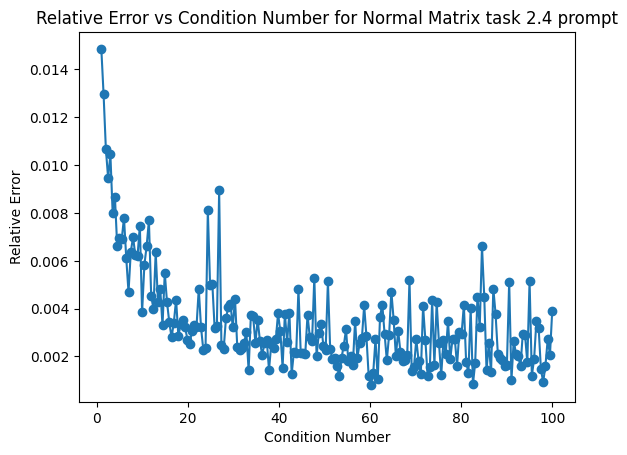

In [8]:
import matplotlib.pyplot as plt
def plot_relative_error_vs_condition_number(n, m, num_samples):
    """
    Plots the relative error against condition number values for random matrices.

    Args:
        n, m: Matrix dimensions
        num_samples: Number of samples for condition numbers

    Returns:
        None (displays the plot)
    """
    condition_numbers = np.linspace(1, 100, num_samples)
    relative_errors = []

    for cond_number in condition_numbers:
        A = construct_random_matrix(n, m, cond_number)
        b = A@x_true
        rel_error = relative_error(b, A)
        print(rel_error, cond_number)
        relative_errors.append(rel_error)

    plt.plot(condition_numbers, relative_errors, marker='o')
    plt.xlabel('Condition Number')
    plt.ylabel('Relative Error')
    plt.title('Relative Error vs Condition Number for Normal Matrix task 2.4 prompt')
    plt.show()

num_samples = 200

plot_relative_error_vs_condition_number(n, m, num_samples)

#I do not think the prompt of the task 4 in problem 2 is properly stated
#So I implement with perturbation of matrix in the next cell


5.284816551607109e-16 1.0
1.7277160443353592e-11 503.5075376884422
1.0813686925552433e-11 1006.0150753768844
7.911849967174189e-11 1508.5226130653266
1.2899902487342518e-11 2011.0301507537688
1.160570764242482e-10 2513.537688442211
1.4203158078556023e-10 3016.045226130653
1.714713054694652e-10 3518.552763819095
3.9300617570675567e-10 4021.0603015075376
5.65252496897712e-10 4523.56783919598
2.9536223502417154e-10 5026.075376884422
1.9890007034478259e-10 5528.582914572864
3.6457884583534527e-10 6031.090452261306
1.192793848900538e-09 6533.597989949749
7.276120784891021e-10 7036.10552763819
1.6907563857075531e-09 7538.613065326633
1.2709129117020116e-09 8041.120603015075
7.456296759062918e-10 8543.628140703517
2.978203592751389e-09 9046.13567839196
4.6701512236614056e-11 9548.643216080402
4.884720460051024e-09 10051.150753768845
9.487678428395525e-11 10553.658291457286
3.813146923869505e-09 11056.165829145728
5.145815530816442e-10 11558.673366834171
2.7309502502938944e-09 12061.1809045226

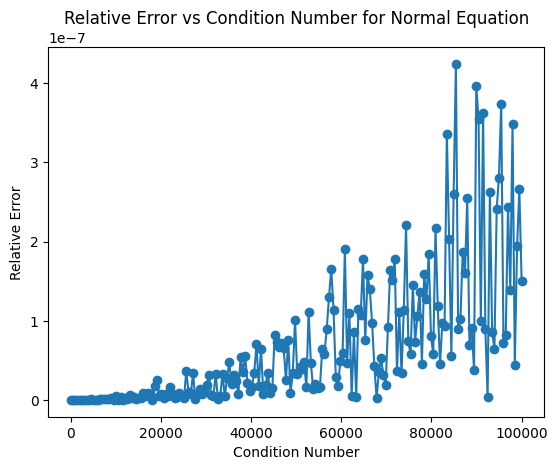

In [9]:
#Perturb A and then b from x_true and get relative error

def perturb_matrix(matrix, magnitude=1e-3):
    """
    Perturbs an n x m matrix by adding random noise to each element.

    Args:
        matrix: Input matrix to be perturbed
        magnitude: Magnitude of the perturbation (default is 1e-3)

    Returns:
        Perturbed matrix
    """
    noise = np.random.normal(scale=magnitude, size=matrix.shape)
    perturbed_matrix = matrix + noise
    return perturbed_matrix

def relative_error1(b, A):
    A_perturbed = perturb_matrix(A)
    b_perturbed = A_perturbed@x_true
    x_new = solve_linear_system(A_perturbed, b_perturbed)
    return np.linalg.norm(x_new - x_true)/np.linalg.norm(x_true)

#Plot for perturbation of matrix and not just vector
def plot_relative_error_vs_condition_number1(n, m, num_samples):
    """
    Plots the relative error against condition number values for random matrices.

    Args:
        n, m: Matrix dimensions
        num_samples: Number of samples for condition numbers

    Returns:
        None (displays the plot)
    """
    condition_numbers = np.linspace(1, 100000, num_samples)
    relative_errors = []

    for cond_number in condition_numbers:
        A = construct_random_matrix(n, m, cond_number)
        b = A@x_true
        rel_error = relative_error1(b, A)
        print(rel_error, cond_number)
        relative_errors.append(rel_error)

    plt.plot(condition_numbers, relative_errors, marker='o')
    plt.xlabel('Condition Number')
    plt.ylabel('Relative Error')
    plt.title('Relative Error vs Condition Number for Normal Equation')
    plt.show()

num_samples = 200

plot_relative_error_vs_condition_number1(n, m, num_samples)


4.188022681078966e-16 1.0
1.2956244328821155e-14 503.5075376884422
3.6978528452567675e-14 1006.0150753768844
7.460192735033339e-14 1508.5226130653266
6.057461844744602e-14 2011.0301507537688
1.982349855546398e-14 2513.537688442211
1.2633606561581995e-13 3016.045226130653
1.3059148282834384e-14 3518.552763819095
1.7401801856567647e-13 4021.0603015075376
1.6818735850053488e-14 4523.56783919598
2.461875513122195e-14 5026.075376884422
3.1504063324409486e-13 5528.582914572864
2.3483721769942973e-13 6031.090452261306
1.4926715611787052e-13 6533.597989949749
2.060480334520198e-13 7036.10552763819
8.001574450419922e-14 7538.613065326633
2.9184889201138533e-13 8041.120603015075
6.286025923953791e-14 8543.628140703517
1.2087647559558182e-14 9046.13567839196
3.544138834567683e-13 9548.643216080402
9.825450399335148e-14 10051.150753768845
1.5420944922508844e-13 10553.658291457286
9.119117886990167e-14 11056.165829145728
2.2815334987838876e-13 11558.673366834171
7.809267512404459e-14 12061.18090452

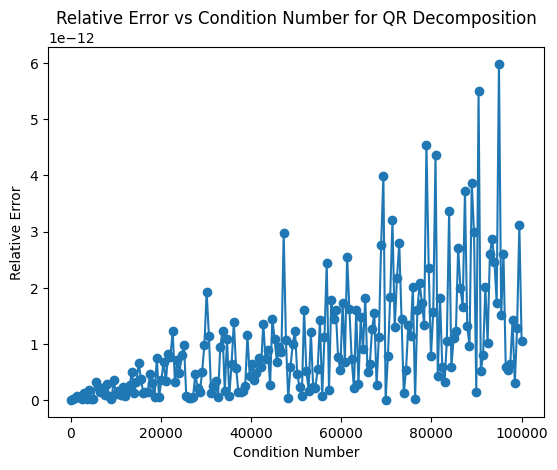

In [10]:
#Solving using QR decomposition

def qr_solution(A, b):
    """
    Performs QR decomposition of an n x m matrix.

    Args:
        matrix: Input matrix

    Returns:
        Q: Orthogonal matrix
        R: Upper triangular matrix
    """
    Q, R = np.linalg.qr(A, mode='reduced')
    x = np.linalg.solve(R, Q.T@b)
    return x

def relative_error_qr(b, A):
    A_perturbed = perturb_matrix(A)
    b_perturbed = A_perturbed@x_true
    x_new = qr_solution(A_perturbed, b_perturbed)
    return np.linalg.norm(x_new - x_true)/np.linalg.norm(x_true)

def plot_relative_error_vs_condition_number_qr(n, m, num_samples):
    """
    Plots the relative error against condition number values for random matrices.

    Args:
        n, m: Matrix dimensions
        num_samples: Number of samples for condition numbers

    Returns:
        None (displays the plot)
    """
    condition_numbers = np.linspace(1, 100000, num_samples)
    relative_errors = []

    for cond_number in condition_numbers:
        A = construct_random_matrix(n, m, cond_number)
        b = A@x_true
        rel_error = relative_error_qr(b, A)
        print(rel_error, cond_number)
        relative_errors.append(rel_error)

    plt.plot(condition_numbers, relative_errors, marker='o')
    plt.xlabel('Condition Number')
    plt.ylabel('Relative Error')
    plt.title('Relative Error vs Condition Number for QR Decomposition')
    plt.show()

num_samples = 200

plot_relative_error_vs_condition_number_qr(n, m, num_samples)


1.7498107636016184e-15 1.0
8.863335804123901e-15 503.5075376884422
9.92239821156661e-15 1006.0150753768844
3.4712237822637044e-14 1508.5226130653266
3.573544903359594e-14 2011.0301507537688
9.565842723795451e-14 2513.537688442211
1.597724789859671e-13 3016.045226130653
7.185256705835557e-14 3518.552763819095
1.0868980731258902e-13 4021.0603015075376
1.0874379749210391e-13 4523.56783919598
7.3709350321606e-14 5026.075376884422
7.110780311043956e-14 5528.582914572864
7.010594608570884e-14 6031.090452261306
3.2735814416322086e-13 6533.597989949749
7.966772645066276e-14 7036.10552763819
2.3604436191024846e-13 7538.613065326633
1.352796193108226e-13 8041.120603015075
3.0759025829927373e-13 8543.628140703517
5.96000154587494e-13 9046.13567839196
1.788672643381499e-13 9548.643216080402
6.167700522443362e-13 10051.150753768845
1.3189757576956472e-13 10553.658291457286
6.933788772296996e-13 11056.165829145728
2.458337735164024e-13 11558.673366834171
3.632850292091548e-13 12061.180904522613
8.16

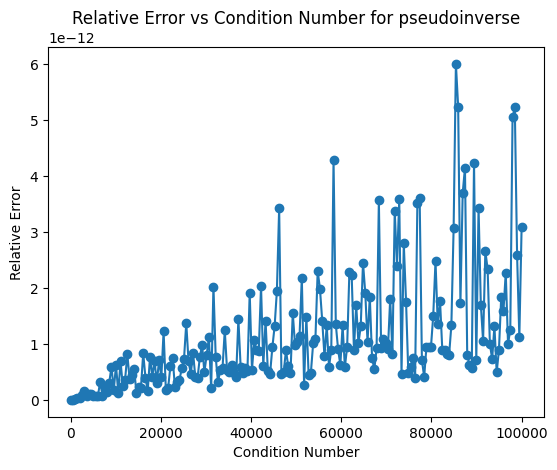

In [11]:
#Solving using pseudoinverse via SVD

def pseudoinverse_solution(A, b):
    x = np.linalg.pinv(A)@b
    return x

def relative_error_SVD(b, A):
    A_perturbed = perturb_matrix(A)
    b_perturbed = A_perturbed@x_true
    x_new = pseudoinverse_solution(A_perturbed, b_perturbed)
    return np.linalg.norm(x_new - x_true)/np.linalg.norm(x_true)

def plot_relative_error_vs_condition_number_SVD(n, m, num_samples):
    """
    Plots the relative error against condition number values for random matrices.

    Args:
        n, m: Matrix dimensions
        num_samples: Number of samples for condition numbers

    Returns:
        None (displays the plot)
    """
    condition_numbers = np.linspace(1, 100000, num_samples)
    relative_errors = []

    for cond_number in condition_numbers:
        A = construct_random_matrix(n, m, cond_number)
        b = A@x_true
        rel_error = relative_error_SVD(b, A)
        print(rel_error, cond_number)
        relative_errors.append(rel_error)

    plt.plot(condition_numbers, relative_errors, marker='o')
    plt.xlabel('Condition Number')
    plt.ylabel('Relative Error')
    plt.title('Relative Error vs Condition Number for pseudoinverse')
    plt.show()

num_samples = 200

plot_relative_error_vs_condition_number_SVD(n, m, num_samples)

In [12]:
def blockx(A, x, b):
    r = A@x-b
    return np.block([[x],[r]])

blockx(A, x_true, b).shape

(140, 1)

8.241383366396302e-16 1.0
7.833734189340414e-14 503.5075376884422
1.6516212294411914e-13 1006.0150753768844
2.6733927828720625e-13 1508.5226130653266
3.960788419534712e-13 2011.0301507537688
3.591554161476908e-13 2513.537688442211
5.125243509321372e-13 3016.045226130653
5.386672572092515e-13 3518.552763819095
7.077666244704897e-13 4021.0603015075376
9.391565707313908e-13 4523.56783919598
8.195710249052021e-13 5026.075376884422
1.342859478413447e-12 5528.582914572864
1.2492968996280433e-12 6031.090452261306
1.0720228869209077e-12 6533.597989949749
1.1518768744496165e-12 7036.10552763819
1.1336448334083898e-12 7538.613065326633
1.6487280996052742e-12 8041.120603015075
1.386760003565892e-12 8543.628140703517
1.3252559871977849e-12 9046.13567839196
1.6073044810995155e-12 9548.643216080402
1.642092645855275e-12 10051.150753768845
1.6337467726495777e-12 10553.658291457286
1.6401906928624115e-12 11056.165829145728
2.660653885092795e-12 11558.673366834171
1.8850456271434332e-12 12061.180904522

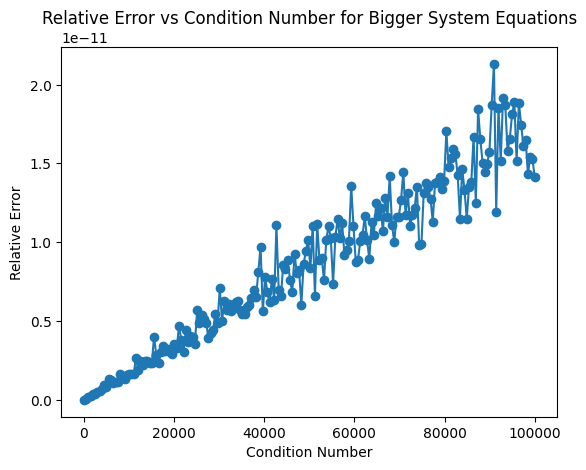

In [13]:
def blockA(A, n, m):
    I = - np.eye(n)
    null = np.zeros((m, m))
    return np.block([[null, A.T],[A, I]])

def blockx(A, x, b):
    r = A@x-b
    return np.block([[x],[r]])

def blockb(b, m):
    null = np.zeros((m, 1))
    return np.block([[null], [b]])

def blocksolution(A, b):
    x = np.linalg.solve(A, b)
    return x

def relative_error_block(b, A):
    A_perturbed = perturb_matrix(A)
    A_perturbed = blockA(A_perturbed, n, m)
    x_block = blockx(A, x_true, b)
    b_perturbed = A_perturbed@x_block
    x_new = blocksolution(A_perturbed, b_perturbed)
    return np.linalg.norm(x_new - x_block)/np.linalg.norm(x_block)

def plot_relative_error_vs_condition_number_block(n, m, num_samples):
    """
    Plots the relative error against condition number values for random matrices.

    Args:
        n, m: Matrix dimensions
        num_samples: Number of samples for condition numbers

    Returns:
        None (displays the plot)
    """
    condition_numbers = np.linspace(1, 100000, num_samples)
    relative_errors = []

    for cond_number in condition_numbers:
        A = construct_random_matrix(n, m, cond_number)
        b = A @ x_true
        rel_error = relative_error_block(b, A)
        print(rel_error, cond_number)
        relative_errors.append(rel_error)

    plt.plot(condition_numbers, relative_errors, marker='o')
    plt.xlabel('Condition Number')
    plt.ylabel('Relative Error')
    plt.title('Relative Error vs Condition Number for Bigger System Equations')
    plt.show()

num_samples = 200

plot_relative_error_vs_condition_number_block(n, m, num_samples)



# Observations

## Let eps = 10^(-12)
### 1. Error range of Normal grows up to 100 000eps. Bad
### 2. Error range of QR and SVD grow up to eps. They behave quite similarly.
### 3. Error range of Bigger System grows uniformly to 10eps. It seems to have some sort of predictable range of error for a given condition number, unlike the rest, as the lower bound of the error continually grows.

# Problem 3 (30 pts)

A generalisation of the eigenvalue problem is the generalised eigenvalue problem; if an eigenpair satisfies
$$ Av = \lambda v,$$
then a generalised eigenvalue for a pair $(A,B)$ of matrices makes the matrix
$$A-\lambda B$$
degenerate.
The generalised eigenvector satisfies $Av = \lambda Bv$. In this task we consider matrices $A,B$ are of size  $n\times n$.

## Task 1 (4 pts)

How many generalised eigenvalues are there for each of the following matrix pairs? Find all, if you can:

  1. $$ A = \begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix}, \quad B = \begin{bmatrix} 1 & 0 \\ 0& 1 \end{bmatrix} $$

  2. $$ A = \begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix}, \quad B = \begin{bmatrix} 1 & 0 \\ 0& 0 \end{bmatrix} $$
  
  3. $$ A = \begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix}, \quad B = \begin{bmatrix} 0 & 1 \\ 0& 0 \end{bmatrix} $$
  
  4. $$ A = \begin{bmatrix} 1 & 2 \\ 0 & 0 \end{bmatrix}, \quad B = \begin{bmatrix} 1 & 0 \\ 0& 0 \end{bmatrix} $$

## Solution
Important note on matrix scalar multiplication [here](https://en.wikipedia.org/wiki/Scalar_multiplication). We multiply all the elements by the scalar.

#### 1.1

\begin{align*}
A-\lambda B &= \begin{bmatrix} 1 - \lambda & 2\\
0 & 3 - \lambda \end{bmatrix}\\
\det(A-\lambda B) &= 0\\
\Rightarrow (1-\lambda)(3-\lambda) &= 0\\
\Rightarrow \lambda_1 = 1&, \ \lambda_2 = 3\\
\end{align*}

#### 1.2

\begin{align*}
A-\lambda B &= \begin{bmatrix} 1 - \lambda & 2\\
0 & 3 \end{bmatrix}\\
\det(A-\lambda B) &= 0\\
\Rightarrow (1-\lambda)3 &= 0\\
\Rightarrow \lambda_1 &= 1&\\
\end{align*}

#### 1.3

\begin{align*}
A-\lambda B &= \begin{bmatrix} 1 & 2 - \lambda\\
0 & 3 \end{bmatrix}\\
\det(A-\lambda B) &= 0\\
\Rightarrow 3 &= 0\\
\Rightarrow &\Leftarrow \\
\end{align*}
No, eigen value for this matrix pair.

#### 1.4

\begin{align*}
A-\lambda B &= \begin{bmatrix} 1- \lambda & 2\\
0 & 0 \end{bmatrix}\\
\det(A-\lambda B) &= 0\\
\Rightarrow 0 &= 0\\
\end{align*}

We can not say much from here, hence, we investigate some more. Let $v$ be a generalised eigen vector of the matrix pair. Then,
\begin{align*}
Av &= \lambda Bv\\
\Rightarrow v_1 + 2v_2 &= \lambda v_1\\
\Rightarrow \lambda &= \frac{2v_2}{v_1}+1\\
\end{align*}

So, the generalised eigen vector, eigen value pair of the matrix pair is,
\begin{align*}
\left( \begin{bmatrix}
v_1\\
v_2\end{bmatrix}, \frac{2v_2}{v_1}+1 \right)
\end{align*}
There are infinitely many generalised eigen values.

## Task 2 (2 pts)

Assume $\mu$ is not a generalised eigenvalue of $(A,B)$. How are spectra of $(A,B)$ and $((A-\mu B)^{-1}A,(A-\mu B)^{-1}B)$ related?

## Solution

#### 2.1
Since $\mu $ is not a generalised eigen value of $(A,\ B)$, we have that $(A-\mu B)$ and $(A-\mu B)^{-1}$ are nondegenerate matrices. Let $v$ be any generalised eigen vector of the pair $(A, B)$ and $\lambda$ the associated eigen value, then

\begin{align*}
Av = \lambda Bv \iff &(A-\mu B)^{-1}Av = (A-\mu B)^{-1}\lambda Bv\\
\iff & (A-\mu B)^{-1}Av = \lambda (A-\mu B)^{-1}Bv\\
\iff & ((A-\mu B)^{-1}A)v = \lambda ((A-\mu B)^{-1}B)v\\
\end{align*}

Hence, $\lambda$ is a generalised eigen value of $(A,\ B)$ if and only if it is also a generalised eigen value of $((A-\mu B)^{-1}A, \ (A-\mu B)^{-1}B)$.

Note that we used the equivalence sign because we did not multiply by a degenerate matrix. (Suppose $M$ is a non degenerate matrix, $Mx = My \iff M^{-1}Mx = M^{-1}My \iff x = y$)

## Task 3 (24 pts)

To solve the complete generalised eigenvalue problem, [QZ algorithm](https://link.springer.com/content/pdf/10.1007/3-540-28502-4_2) can be used. This algorithm is the direct generalization of the QR algorithm for the standard eigenvalue problem.
However, in this task we focus on the partial generalised eigenvalue problem and its application to the canonical correlation analysis.

You can test the algorithms in the further tasks only for the symmetric matrices $A$ and symmetric positive definite matrices $B$.

### From power method to its generalisation form

In order to recover the largest generalised eigenvalue and the corresponding eigenvector, one can note that

$$Av = \lambda Bv$$

is equivalent to

$$B^{-1}Av = \lambda v.$$

Therefore, one has to use the power method to $B^{-1}A$ with a random initialisation.
However, it may be rather expensive to invert $B$ explicitly.
Therefore, we would like to avoid doing that and inexactly apply $B^{-1}$ through the solving linear system $Bx = y$.
Implement the resulting algorithm based on this idea, verify its convergence speed and check that the generalised eigenvalue relation holds.

Important notes that will help you successfully update the classical power method:

1) think about how the normalization step should be changed, the energy norm definition $\|x\|^2_A = x^\top A x$ can help in the proper reformultation

2) think how the step $x_{k+1}= Ax_k$ will be updated with the aforementioned notes regarding operations with matrix $B$

### From *block* power method to its generalisation form

Just as in the regular eigenvalue case, generalised eigenvalues can be extended to block power method (which can yield the QZ algoritm, analogously to emergence of QR in the regular case).
The extension is straightforward and consists of replacing vectors with matrices corresponding to the $k$ largest  generalised eigenvectors.
Moreover, since orthogonality is reqiored, a routine for enforcing orthogonality of the iterates is also needed. Implement the block power method for the generalised eigenvalue problem.
Pay special attention how the orthogonalisation procedure shown be changed to take into account the matrix $B$.
Separately implement the proper orthoghonalisation algorithm and use it in your code for the target block power method.
Test convergence speed and check that results satisfy the target equation.

In addition, you can check the correctness of your result with ```scipy.linalg.eigh``` function with proper argumets.

### Application of the generalised eignevalue problem to the canonical correlation analysis

When one studies two datasets, it may be desirable to find the orthogonal (in the sense of the inner products induced by the correlation matrices) bases of spaces that capture linear combinations of features that are most correlated between the two datasets.
Such a problem is called the problem of **canonical correlation analysis** and can be formulated as finding such a sequence $\{(\phi_i, \psi_i)\}$ that for data matrices $X\in\mathbb{R}^{n\times a}, Y\in\mathbb{R}^{n\times b}$

$$(\phi_i, \psi_i)\in \arg\max_{\phi, \psi} \phi^TS_{xy}\psi$$

Subject to:

$$\|\phi\|_{S_x} = \|\psi\|_{S_y} = 1$$

$$\langle\phi, \phi_j\rangle_{S_x} = 0 \quad \forall j<i$$


$$\langle\psi, \psi_j\rangle_{S_y} = 0 \quad \forall j<i,$$

where $\|\cdot\|_A$ is the energy norm induced by $A$, $\langle\cdot,\cdot\rangle_A$ is the inner product induced by $A$, $S_y = \frac{1}{n}Y^\top Y$, $S_x = \frac{1}{n}X^\top X$, $S_{xy} = \frac{1}{n}X^\top Y$

We are asked to find two bases of the maximal-cross-correlation subspace, both orthogonal in the inner product induced by the correlation matrix of the appropriate dataset.

Consider firstly the problem of simply finding a basis of the described space, subject only to unit-vector conditions (since orthogonalisation can always be carried out separately).
The Lagrangian will then read:

$$L(\phi, \psi, \lambda, \mu) = \phi^TS_{xy}\psi-\lambda(\phi^TS_x\phi-1)-\mu(\psi^TS_y\psi-1),$$

where $\lambda$ and $\mu$ are dual variables.

From the stationarity of Lagrangian with respect ot the original variables $\psi$ and $\phi$ follows the following equation on the dual varibles

$$S_{xy}\psi = \lambda S_x\phi$$

$$S_{yx}\phi = \mu S_y\psi$$

Note that

$$\|\phi\|_{S_x} = \phi^TS_x\phi = \frac{1}{\lambda}\phi^T S_{xy}\psi = \frac{1}{\lambda} \psi^TS_{yx}\phi = \frac{\mu}{\lambda}\psi^TS_y\psi = \frac{\mu}{\lambda}\|\psi\|_{S_y} = \frac{\mu}{\lambda} = 1,$$

Therefore $\mu=\lambda$ and the equations above can be simplified in the following way

$$S_{xy}\psi = \lambda S_x\phi$$

$$S_{yx}\phi = \lambda S_y\psi$$

and the problem admits a block representation:

$$\begin{bmatrix}0 & S_{xy} \\ S_{yx} & 0\end{bmatrix}\begin{bmatrix}\phi\\\psi\end{bmatrix} = \lambda \begin{bmatrix}S_x & 0 \\ 0 & S_y\end{bmatrix}\begin{bmatrix}\phi\\\psi\end{bmatrix}. $$

Surprisingly, this problem has the form of the generalised eigenvalue problem.
Therefore, the target vectors can be found as the leading eigenvectors and will be an orthonormal basis.

You need to implement the algorithm for extracting $k$ vectors $\psi_i, \phi_i$ from the given data matrices $X \in \mathbb{R}^{n \times d_1}$ and $Y \in \mathbb{R}^{n \times d_2}$.
You should use the power method from the previous task and take into account the special structure of the matrices $(A, B)$ coming from the original problem statment. Please, use this structure for efficient implementation of the internal steps.

In [15]:
import numpy as np
from scipy.linalg import solve, eigh

def power_method(A, B, max_iter=100, tol=1e-9):
    n = A.shape[0]

    # Random initial vector
    y = np.random.randn(n)
    y = y / np.linalg.norm(y, ord=2)

    for _ in range(max_iter):
        # Solve Bx = y to avoid explicit inversion
        x = solve(B, y)

        #Normalise x
        x = x/np.sqrt(x @ B @x)


        # Update y using Ax
        y = A @ x

        # Normalize using energy norm
        y_norm = np.sqrt(y @ B @ y)
        y = y / y_norm

        # Calculate the eigenvalue
        eigenvalue = x @ A @ x / (x @ B @ x)

        # Check convergence
        if np.linalg.norm(A @ x - B @ x * eigenvalue) < tol:
            break

    return eigenvalue, x

# Example usage
# Generate sample matrices symmetric A and positive definite symmetric B
A = np.array([
    [1, 2, 3, 4, 5],
    [2, 6, 7, 8, 9],
    [3, 7, 10, 11, 12],
    [4, 8, 11, 13, 14],
    [5, 9, 12, 14, 15]
])

B = np.array([
    [6, 2, 1, 3, 4],
    [2, 7, 5, 8, 9],
    [1, 5, 10, 11, 12],
    [3, 8, 11, 13, 14],
    [4, 9, 12, 14, 15]
])

B = B.T@B

eigenvalue, eigenvector = power_method(A, B)
print("Eigenvalue:", eigenvalue)
print("Eigenvector:", eigenvector)
print('Maximum absolute value is',max(abs(eigh(A, B)[0])))
print('Error is low: ',max(abs(eigh(A, B)[0]))-eigenvalue)

Eigenvalue: 135.2180067706536
Eigenvector: [ -0.11063724   3.94859354   7.65752686 -25.6439086   15.50521859]
Maximum absolute value is 135.21800675279866
Error is low:  -1.7854944189821254e-08


In [16]:
def orthogonalisation(H, B):
    n, k = H.shape

    # Initialize an empty matrix to store the orthogonalized vectors
    Q = np.zeros_like(H)

    # Perform Gram-Schmidt orthogonalization
    for i in range(k):
        h = H[:, i]

        # Orthogonalize h with respect to previous vectors
        for j in range(i):
            h -= (h.T @ B @ Q[:, j]) * Q[:, j]

        # Solve Bx = h to obtain orthogonalized vector
        x = solve(B, h)
        Q[:, i] = x / np.linalg.norm(x, ord=2)

    return Q

def general_power_method(A, B, k, max_iter=100, tol=1e-9):
    n = A.shape[0]
    H = np.random.rand(n, k)
    H = orthogonalisation(H, B)

    for i in range(max_iter):
        Y = np.dot(np.linalg.inv(B), np.dot(A, H))
        H, _ = np.linalg.qr(Y)
        H = orthogonalisation(H, B)

        eigen_estimate = np.diag(np.dot(H.T, np.dot(A, H))/np.dot(H.T, np.dot(B, H)))
        if i > 0:
            error = np.linalg.norm(eigen_estimate - eigen_estimate_prev)
            if error < tol:
                break
        eigen_estimate_prev = eigen_estimate
    return eigen_estimate, H

def speed_convergence(A, B, k, max_iter, tol): #To estimate length of array before convergence
    convergence = []
    for i in range(1, max_iter+1):
        eigen_estimate, _ = general_power_method(A, B, k, i, tol)
        convergence.append(eigen_estimate)

        if i > 1:
            error = np.linalg.norm(eigen_estimate - convergence[-2])
            if error < tol:
                break
    return convergence

# I provide sample matrices: symmetric A and positive definite symmetric B
A = np.array([
    [1, 2, 3, 4, 5],
    [2, 6, 7, 8, 9],
    [3, 7, 10, 11, 12],
    [4, 8, 11, 13, 14],
    [5, 9, 12, 14, 15]
])

B = np.array([
    [6, 2, 1, 3, 4],
    [2, 7, 5, 8, 9],
    [1, 5, 10, 11, 12],
    [3, 8, 11, 13, 14],
    [4, 9, 12, 14, 15]
])

B = B.T@B #Ensuring B is positive definite

k = 3
max_iter = 1000
tol = 1e-12

convergence = speed_convergence(A, B, k, max_iter, tol)
print(convergence, "\n ", "Converges after ", len(convergence), "steps")
print("\n True eigen values: Absolute values")
print(sorted(abs(eigh(A, B)[0]), reverse = True)[:k])
print("\n Estimated eigen values: Absolute values")
print(abs(convergence[-1]))

[array([ 1.34311268e+02, -1.06178891e+00,  8.15880412e-02]), array([ 1.34311272e+02, -1.06185020e+00,  8.28751516e-02]), array([ 1.34311272e+02, -1.06184987e+00,  8.31318405e-02]), array([ 1.34311272e+02, -1.06184988e+00,  8.31387868e-02]), array([ 1.34311272e+02, -1.06184988e+00,  8.31389531e-02]), array([ 1.34311272e+02, -1.06184988e+00,  8.31383352e-02]), array([ 1.34311272e+02, -1.06184988e+00,  8.31383251e-02]), array([ 1.34311272e+02, -1.06184988e+00,  8.31383259e-02]), array([ 1.34311272e+02, -1.06184988e+00,  8.31383240e-02]), array([ 1.34311272e+02, -1.06184988e+00,  8.31383240e-02]), array([ 1.34311272e+02, -1.06184988e+00,  8.31383240e-02]), array([ 1.34311272e+02, -1.06184988e+00,  8.31383240e-02])] 
  Converges after  12 steps

 True eigen values: Absolute values
[135.21800675279866, 1.1000382488831588, 0.08451576257989546]

 Estimated eigen values: Absolute values
[1.34311272e+02 1.06184988e+00 8.31383240e-02]


In [17]:
from scipy.linalg import eigh

def canonical_correlation_analysis(X, Y, k):
    # I just implement formulas as stated in the task
    n = X.shape[0]
    Sx = (1/n) * X.T @ X
    Sy = (1/n) * Y.T @ Y
    Sxy = (1/n) * X.T @ Y
    Syx = Sxy.T
    A = np.block([[np.zeros((X.shape[1], X.shape[1])), Sxy], [Syx, np.zeros((Y.shape[1], Y.shape[1]))]])
    B = np.block([[Sx, np.zeros((X.shape[1], Y.shape[1]))], [np.zeros((Y.shape[1], X.shape[1])), Sy]])
    eigenvalues, eigenvectors = general_power_method(A, B, k, 100, 1e-9)
    phi = eigenvectors[:X.shape[1]]
    psi = eigenvectors[X.shape[1]:]

    return phi, psi

X = np.array([
    [1, 2, 3, 4, 5],
    [2, 6, 7, 8, 9],
    [3, 7, 10, 11, 12],
    [4, 8, 11, 13, 14],
    [5, 9, 12, 14, 15]
])

Y = np.array([
    [6, 2, 1, 3, 4],
    [2, 7, 5, 8, 9],
    [1, 5, 10, 11, 12],
    [3, 8, 11, 13, 14],
    [4, 9, 12, 14, 15]
])

B = B.T@B #Ensuring B is positive definite

k = 4
phi, psi = canonical_correlation_analysis(X, Y, k)
phi, psi

(array([[-1.57701213e-02, -6.62230852e-03,  2.54682116e-01,
         -6.81279454e-02],
        [ 5.41471175e-04,  2.27378668e-04,  2.44424573e-01,
         -6.53840333e-02],
        [-1.74295868e-02, -7.31916381e-03, -5.02276783e-01,
          1.34359985e-01],
        [ 4.31741079e-02,  1.81299977e-02,  3.16510663e-01,
         -8.46671981e-02],
        [-2.16704305e-02, -9.10001095e-03, -1.08415497e-01,
          2.90013496e-02]]),
 array([[-0.00410612,  0.00411101, -0.0343793 , -0.04723664],
        [ 0.1252746 , -0.12542386, -0.16082897, -0.22097662],
        [ 0.2436252 , -0.24391546, -0.27750442, -0.38128696],
        [-0.82086309,  0.8218411 ,  0.59353493,  0.8155082 ],
        [ 0.49823044, -0.49882405, -0.23417611, -0.3217545 ]]))

- You are further asked to test the developed algorithm on an arbitrary splitting of the MNIST dataset (import it from [keras](https://keras.io/api/datasets/mnist/), [PyTorch](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST), etc). Test different values of $k$.
- In addition, test it on synthetic data of known covariance.
You can generate bivariate data with known covariance matrix through the multiplication of vectors from standard normal distribution by the Cholesky factor of the desired covariance matrix.
Then split the generated bivaritate data into two univariate vectors. Run the prepared code and comment on the obtained results.

In [18]:
from tensorflow.keras.utils import get_file

In [19]:
pip install --upgrade tensorflow

In [31]:
# Your code is here

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from scipy.linalg import cholesky

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X_mnist = mnist.data.astype(float)
y_mnist = mnist.target.astype(int)

# Split the MNIST dataset
X_train, X_test, _, _ = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Generate synthetic data
# Stack the vectors horizontally to create a 100 by 2 matrix
data_matrix = np.random.rand(100, 100)

# Compute the correlation matrix
corr_matrix = np.corrcoef(data_matrix, rowvar=False)

# Ensure the matrix is symmetric positive definite
cov_matrix = corr_matrix + np.eye(100) * 1e-6

synthetic_data = cov_matrix

# Split the synthetic data into two univariate vectors
X_synthetic = cholesky(cov_matrix, lower=True) @ np.random.rand(100, 1)
Y_synthetic = cholesky(cov_matrix, lower=True) @ np.random.rand(100, 1)

# Test the CCA algorithm on synthetic data
k_synthetic = 2
phi_synthetic, psi_synthetic = canonical_correlation_analysis(X_synthetic, Y_synthetic, k_synthetic)
print(f"\nSynthetic Data - k={k_synthetic}:\nCanonical Correlation Coefficients:\n{phi_synthetic}")

# Test the CCA algorithm on MNIST dataset for different values of k
k_values = [1, 2, 3]
for k in k_values:
    phi_mnist, psi_mnist = canonical_correlation_analysis(X_train_normalized, X_train_normalized, k)
    print(f"MNIST dataset - k={k}:\nCanonical Correlation Coefficients:\n{phi_mnist}")

# Test the CCA algorithm on synthetic data
k_synthetic = 2
phi_synthetic, psi_synthetic = canonical_correlation_analysis(X_synthetic, Y_synthetic, k_synthetic)
print(f"\nSynthetic Data - k={k_synthetic}:\nCanonical Correlation Coefficients:\n{phi_synthetic}")


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(



Synthetic Data - k=2:
Canonical Correlation Coefficients:
[[-0.83638036 -0.54240031]]


LinAlgError: ignored